<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n20.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,79.118621,82.483015,87.375010,71.862275,-1.152458,329.686462,330.846718,-1.160255
1,0.0,1.0,23.550291,90.120991,55.708863,34.821396,0.856885,215.058426,214.969372,0.089054
2,0.0,2.0,39.167741,73.428729,78.792643,50.375639,-0.563915,251.200836,251.826834,-0.625998
3,0.0,3.0,63.289627,32.837587,58.650151,95.742088,-0.406649,260.112804,259.946500,0.166304
4,0.0,4.0,63.824467,88.096669,53.124080,66.408241,1.108591,282.562048,282.071375,0.490673
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.202344,31.093516,99.286343,86.147050,0.643117,320.372370,320.400465,-0.028095
19996,999.0,16.0,42.744237,77.259777,85.298008,82.900133,0.070901,298.273057,298.426262,-0.153205
19997,999.0,17.0,20.191400,38.500785,78.127237,80.114067,0.310037,227.243526,226.425681,0.817845
19998,999.0,18.0,86.955013,48.289977,98.305042,67.395736,1.800785,312.746553,311.758937,0.987616


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    79.118621  82.483015  87.375010  71.862275 -1.152458  329.686462   
      1.0    23.550291  90.120991  55.708863  34.821396  0.856885  215.058426   
      2.0    39.167741  73.428729  78.792643  50.375639 -0.563915  251.200836   
      3.0    63.289627  32.837587  58.650151  95.742088 -0.406649  260.112804   
      4.0    63.824467  88.096669  53.124080  66.408241  1.108591  282.562048   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   93.202344  31.093516  99.286343  86.147050  0.643117  320.372370   
      16.0   42.744237  77.259777  85.298008  82.900133  0.070901  298.273057   
      17.0   20.191400  38.500785  78.127237  80.114067  0.310037  227.243526   
      18.0   86.955013  48.289977  98.305042  67.395736  1.800785  312.746553   
      19.0   52.700617  92.209859  36.746058  72.576671  0.727787  264.960992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    330.846718 -1.160255  
      1.0    214.969372  0.089054  
      2.0    251.826834 -0.625998  
      3.0    259.946500  0.166304  
      4.0    282.071375  0.490673  
...                 ...       ...  
999.0 15.0   320.400465 -0.028095  
      16.0   298.426262 -0.153205  
      17.0   226.425681  0.817845  
      18.0   311.758937  0.987616  
      19.0   264.278283  0.682709  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    79.118621  82.483015  87.375010  71.862275 -1.152458  329.686462   
      1.0    23.550291  90.120991  55.708863  34.821396  0.856885  215.058426   
      2.0    39.167741  73.428729  78.792643  50.375639 -0.563915  251.200836   
      3.0    63.289627  32.837587  58.650151  95.742088 -0.406649  260.112804   
      4.0    63.824467  88.096669  53.124080  66.408241  1.108591  282.562048   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   93.202344  31.093516  99.286343  86.147050  0.643117  320.372370   
      16.0   42.744237  77.259777  85.298008  82.900133  0.070901  298.273057   
      17.0   20.191400  38.500785  78.127237  80.114067  0.310037  227.243526   
      18.0   86.955013  48.289977  98.305042  67.395736  1.800785  312.746553   
      19.0   52.700617  92.209859  36.746058  72.576671  0.727787  264.960992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    330.846718 -1.160255  
      1.0    214.969372  0.089054  
      2.0    251.826834 -0.625998  
      3.0    259.946500  0.166304  
      4.0    282.071375  0.490673  
...                 ...       ...  
999.0 15.0   320.400465 -0.028095  
      16.0   298.426262 -0.153205  
      17.0   226.425681  0.817845  
      18.0   311.758937  0.987616  
      19.0   264.278283  0.682709  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,79.118621,82.483015,87.375010,71.862275,-1.152458,329.686462,330.846718,-1.160255
1,0.0,1.0,23.550291,90.120991,55.708863,34.821396,0.856885,215.058426,214.969372,0.089054
2,0.0,2.0,39.167741,73.428729,78.792643,50.375639,-0.563915,251.200836,251.826834,-0.625998
3,0.0,3.0,63.289627,32.837587,58.650151,95.742088,-0.406649,260.112804,259.946500,0.166304
4,0.0,4.0,63.824467,88.096669,53.124080,66.408241,1.108591,282.562048,282.071375,0.490673
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,93.202344,31.093516,99.286343,86.147050,0.643117,320.372370,320.400465,-0.028095
19996,999.0,16.0,42.744237,77.259777,85.298008,82.900133,0.070901,298.273057,298.426262,-0.153205
19997,999.0,17.0,20.191400,38.500785,78.127237,80.114067,0.310037,227.243526,226.425681,0.817845
19998,999.0,18.0,86.955013,48.289977,98.305042,67.395736,1.800785,312.746553,311.758937,0.987616


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    79.118621  82.483015  87.375010  71.862275 -1.152458  329.686462   
      1.0    23.550291  90.120991  55.708863  34.821396  0.856885  215.058426   
      2.0    39.167741  73.428729  78.792643  50.375639 -0.563915  251.200836   
      3.0    63.289627  32.837587  58.650151  95.742088 -0.406649  260.112804   
      4.0    63.824467  88.096669  53.124080  66.408241  1.108591  282.562048   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   93.202344  31.093516  99.286343  86.147050  0.643117  320.372370   
      16.0   42.744237  77.259777  85.298008  82.900133  0.070901  298.273057   
      17.0   20.191400  38.500785  78.127237  80.114067  0.310037  227.243526   
      18.0   86.955013  48.289977  98.305042  67.395736  1.800785  312.746553   
      19.0   52.700617  92.209859  36.746058  72.576671  0.727787  264.960992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    330.846718 -1.160255  
      1.0    214.969372  0.089054  
      2.0    251.826834 -0.625998  
      3.0    259.946500  0.166304  
      4.0    282.071375  0.490673  
...                 ...       ...  
999.0 15.0   320.400465 -0.028095  
      16.0   298.426262 -0.153205  
      17.0   226.425681  0.817845  
      18.0   311.758937  0.987616  
      19.0   264.278283  0.682709  

[20000 rows x 8 columns]

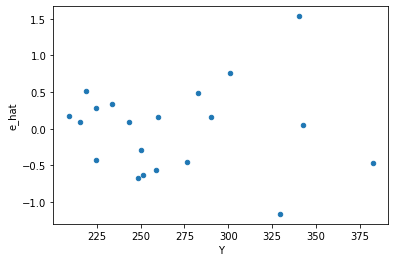

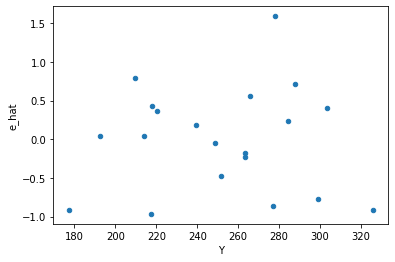

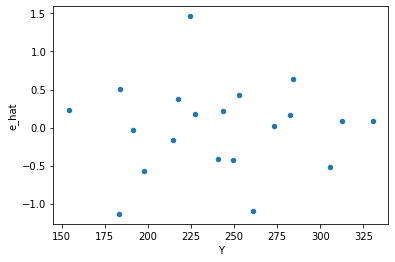

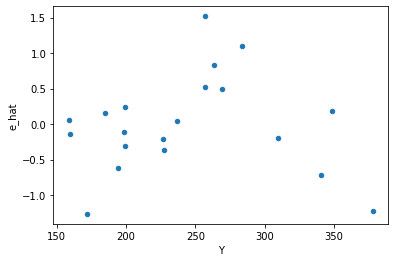

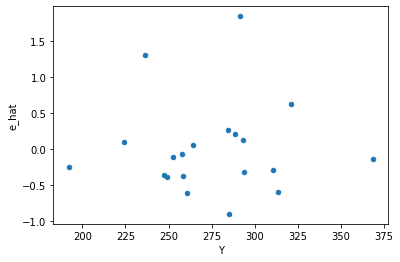

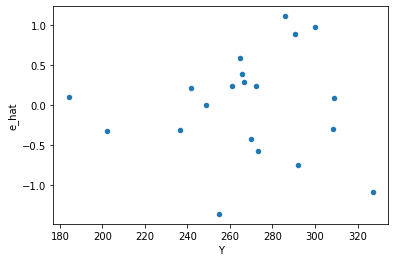

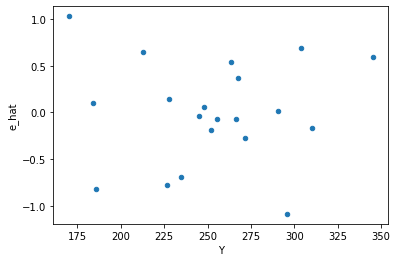

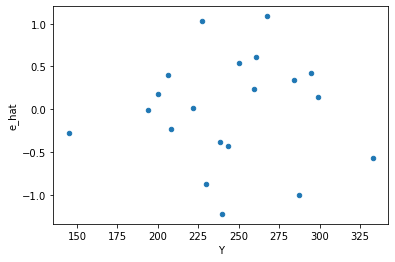

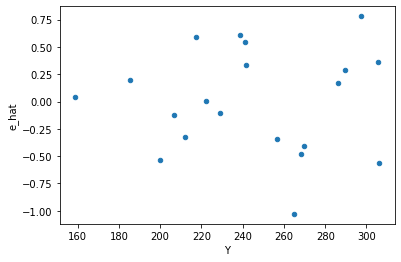

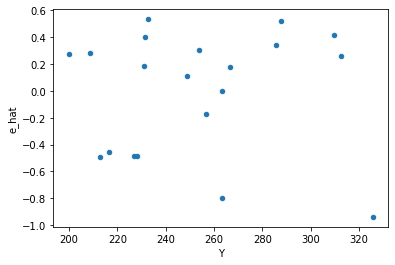

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,2.0,2.0959307689741467,3.4031566556170105,0.20959307689741466,1.7015783278085053,8.118485366963446,0.22914186077190202,0.885429069614049,0.11457093038595101,Reject001=1 : Homoscedasticity
1.0,4.0,8.0,1.5411633840025887,4.137845029966899,0.38529084600064717,0.5172306287458623,1.3424420385658307,0.6682806689799081,0.6658596655100459,0.33414033448995406,Reject001=1 : Homoscedasticity
3.0,5.0,7.0,0.6347150281519982,1.6650774482574857,0.12694300563039965,0.23786820689392654,1.8738189293114005,0.43483559720108045,0.7825822013994598,0.21741779860054022,Reject001=1 : Homoscedasticity
5.0,1.0,11.0,2.65764083525338e-25,7.6775332231657485,2.65764083525338e-25,0.6979575657423408,2.6262298369440785e+24,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
7.0,5.0,7.0,0.872995232386623,3.132517903093361,0.1745990464773246,0.44750255758476587,2.5630297909037183,0.2518847668839914,0.8740576165580043,0.1259423834419957,Reject001=1 : Homoscedasticity
8.0,7.0,5.0,0.7572938428942507,1.5565941489017618,0.10818483469917868,0.31131882978035236,2.8776568420704516,0.26246555677279515,0.8687672216136024,0.13123277838639757,Reject001=1 : Homoscedasticity
9.0,8.0,4.0,1.4530049963012133,1.779285480270751,0.18162562453765166,0.44482137006768774,2.449111303540072,0.4036229008890282,0.7981885495554859,0.2018114504445141,Reject001=1 : Homoscedasticity
11.0,1.0,11.0,4.355622912974536e-24,3.971554788805782,4.355622912974536e-24,0.3610504353459802,8.28929506892074e+22,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
12.0,4.0,8.0,0.19985518906637795,4.689244946181738,0.04996379726659449,0.5861556182727172,11.731606690042703,0.0039758640583291704,0.9980120679708354,0.0019879320291645852,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,2.0,2.0959307689741467,3.4031566556170105,0.20959307689741466,1.7015783278085053,8.118485366963446,0.22914186077190202,Reject001=1 : Homoscedasticity
1.0,4.0,8.0,1.5411633840025887,4.137845029966899,0.38529084600064717,0.5172306287458623,1.3424420385658307,0.6682806689799081,Reject001=1 : Homoscedasticity
2.0,5.0,7.0,3.304388284711075,1.4676202083147025,0.660877656942215,0.20966002975924322,0.31724484487690163,0.22464440194964105,Reject001=1 : Homoscedasticity
3.0,5.0,7.0,0.6347150281519982,1.6650774482574857,0.12694300563039965,0.23786820689392654,1.8738189293114005,0.43483559720108045,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,4.631736451652513,2.2125632564480844,0.7719560752754188,0.3687605427413474,0.4776962764491242,0.3903953075168363,Reject001=1 : Homoscedasticity
5.0,1.0,11.0,2.65764083525338e-25,7.6775332231657485,2.65764083525338e-25,0.6979575657423408,2.6262298369440785e+24,0.0,Reject001=0 : Heteroscedasticity
6.0,9.0,3.0,2.2063314107265533,0.4322819992366552,0.24514793452517258,0.14409399974555173,0.5877838621183883,0.47150618522516485,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,0.872995232386623,3.132517903093361,0.1745990464773246,0.44750255758476587,2.5630297909037183,0.2518847668839914,Reject001=1 : Homoscedasticity
8.0,7.0,5.0,0.7572938428942507,1.5565941489017618,0.10818483469917868,0.31131882978035236,2.8776568420704516,0.26246555677279515,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      773
Reject001=0 : Heteroscedasticity    227
Name: Result_test, dtype: int64